In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-crashes-full-data-1908-2023/aircrashesFullData.csv


In [3]:
crashes = pd.read_csv('/kaggle/input/air-crashes-full-data-1908-2023/aircrashesFullData.csv')

In [4]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5030 entries, 0 to 5029
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     5030 non-null   int64 
 1   Quarter                  5030 non-null   object
 2   Month                    5030 non-null   object
 3   Day                      5030 non-null   int64 
 4   Country/Region           4800 non-null   object
 5   Aircraft Manufacturer    5030 non-null   object
 6   Aircraft                 5030 non-null   object
 7   Location                 5030 non-null   object
 8   Operator                 4796 non-null   object
 9   Sum of Ground            5030 non-null   int64 
 10  Sum of Fatalities (air)  5030 non-null   int64 
 11  Sum of Aboard            5030 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 471.7+ KB


There are 5 integer columns with the rest being objects.

In [5]:
crashes.isnull().sum()
# Found that some country and Operator fields are missing from the data-set

Year                         0
Quarter                      0
Month                        0
Day                          0
Country/Region             230
Aircraft Manufacturer        0
Aircraft                     0
Location                     0
Operator                   234
Sum of Ground                0
Sum of Fatalities (air)      0
Sum of Aboard                0
dtype: int64

In [6]:
crashes.groupby('Aircraft Manufacturer')[['Sum of Fatalities (air)','Sum of Ground','Sum of Aboard']].sum().reset_index().sort_values('Sum of Aboard',ascending=False)

,Aircraft Manufacturer,Sum of Fatalities (air),Sum of Ground,Sum of Aboard
110,Boeing,20089,6128,32334
226,Douglas,16673,142,20883
422,McDonnell Douglas,6992,238,13023
551,Tupolev,6077,37,8353
38,Antonov,6527,378,7799
...,...,...,...,...
344,L,6,0,0
1,?42,0,0,0
255,FD Type,3,10,0
517,Spad,0,0,0


Boeing and Douglas aircraft manufacturers have the most fatalities with Boeing having the most fatalities 

In [28]:
crashes['Quarter'].value_counts(normalize=True)*100

Quarter
Qtr 4    27.196819
Qtr 3    26.500994
Qtr 1    24.910537
Qtr 2    21.391650
Name: proportion, dtype: float64

In [80]:
crashes.groupby('Aircraft Manufacturer')['Quarter'].value_counts().sort_values(ascending=False).head(20)

Aircraft Manufacturer  Quarter
Douglas                Qtr 4      279
                       Qtr 1      274
                       Qtr 3      238
                       Qtr 2      202
Boeing                 Qtr 4      106
                       Qtr 3      102
                       Qtr 1      100
Antonov                Qtr 4       82
                       Qtr 1       79
Boeing                 Qtr 2       79
Antonov                Qtr 3       72
Lockheed               Qtr 4       61
                       Qtr 3       60
                       Qtr 2       51
de Havilland Canada    Qtr 3       51
Antonov                Qtr 2       51
Ilyushin               Qtr 4       45
de Havilland Canada    Qtr 2       43
Ilyushin               Qtr 3       39
Lockheed               Qtr 1       39
Name: count, dtype: int64

Despite being second with the regards to the number of total fatalities, there are more quarterly records of accidents from Douglas.

performing analysis to check if the choice operators has an impact. 

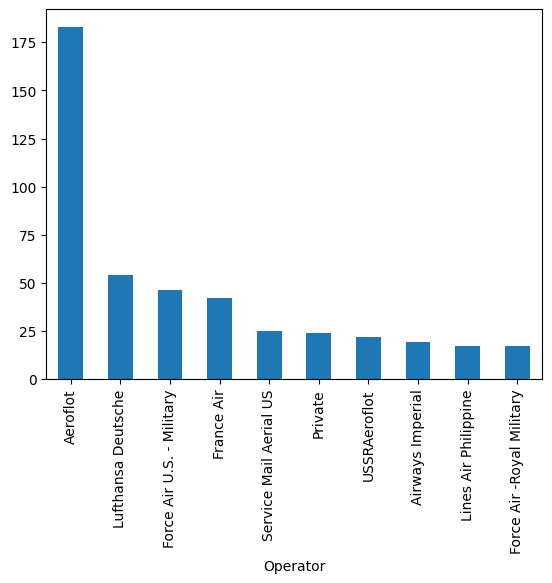

In [50]:
crashes[~(crashes['Aircraft Manufacturer'].isin(['Boeing','Douglas']))].Operator.value_counts().head(10).plot.bar()
not_b_d = crashes[~(crashes['Aircraft Manufacturer'].isin(['Boeing','Douglas']))].Operator.head(10)

In [51]:
crashes[(crashes['Aircraft Manufacturer'].isin(['Boeing','Douglas']))].Operator.value_counts().head(10)

Operator
Force Air U.S. - Military              46
Lines Air United                       27
Corporation Aviation National China    24
Forces Air Army U.S. - Military        23
Avianca                                22
Airlines Indian                        21
Airways World American Pan             18
France Air                             15
Airlines Ethiopian                     13
Airlines American                      12
Name: count, dtype: int64

In [52]:
not_b_d.dropna(inplace=True)

In [53]:
not_b_d

0                Army U.S. - Military
2          Navy U.S. - JerseyMilitary
3    Canada          Columbia Private
5              Navy German - Military
6              Navy German - Military
7              Navy German - Military
8              Army German - Military
9              Navy German - Military
Name: Operator, dtype: object

In [55]:
crashes[(crashes['Aircraft Manufacturer'].isin(['Boeing','Douglas']))& (crashes['Operator']).isin(not_b_d)].Operator.value_counts().head(10)

Operator
Army U.S. - Military    3
Name: count, dtype: int64

Boeing and Douglas dont use any of the top 10 Operators
Could this a determining factor for the accidents?

To confirm this, i will check the distribution of operators between the different manufacturers and how each manufacturer with the top operators( not used by Boeing or Douglas) perform.

In [58]:
crashes.groupby('Aircraft Manufacturer')['Operator'].value_counts().sort_values(ascending=False)

Aircraft Manufacturer  Operator                     
Ilyushin               Aeroflot                         57
Antonov                Aeroflot                         46
Tupolev                Aeroflot                         38
Junkers                Lufthansa Deutsche               31
Lockheed               Force Air U.S. - Military        28
                                                        ..
De Havilland           Service Transport Air Holdens     1
                       Force Air Kenyan - Military       1
                       Force Air Zairean - Military      1
                       GuineaQantas                      1
deHavilland            Australia Qantas                  1
Name: count, Length: 3506, dtype: int64

<Axes: xlabel='Aircraft Manufacturer'>

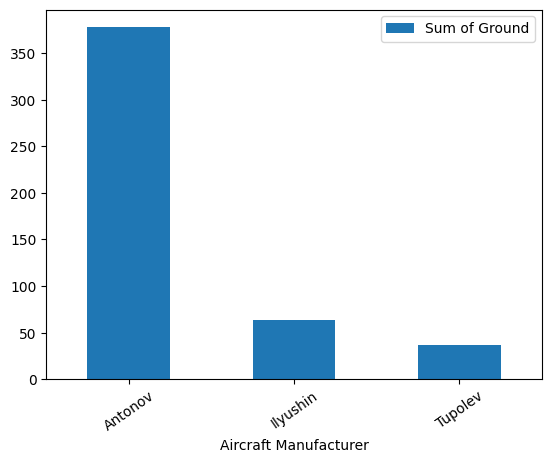

In [70]:
crashes[crashes['Aircraft Manufacturer'].isin(['Ilyushin','Antonov','Tupolev'])].groupby('Aircraft Manufacturer')[['Sum of Ground']].agg('sum').plot(kind='bar',rot=35)

this doesnt prove anything as ground accidents aren't that frequent; according to the dataset.

<Axes: xlabel='Aircraft Manufacturer'>

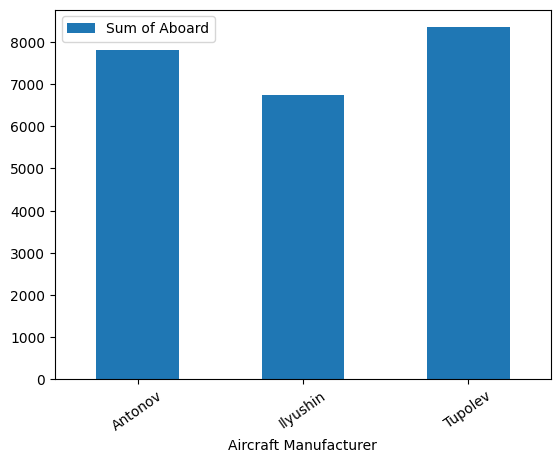

In [71]:
crashes[crashes['Aircraft Manufacturer'].isin(['Ilyushin','Antonov','Tupolev'])].groupby('Aircraft Manufacturer')[['Sum of Aboard']].agg('sum').plot(kind='bar',rot=35)

<Axes: xlabel='Aircraft Manufacturer'>

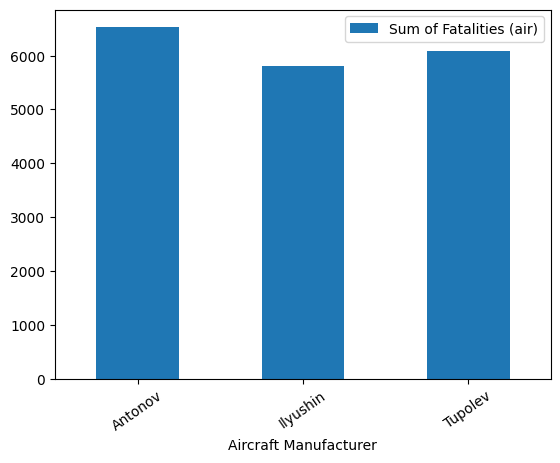

In [75]:
crashes[crashes['Aircraft Manufacturer'].isin(['Ilyushin','Antonov','Tupolev'])].groupby('Aircraft Manufacturer')[['Sum of Fatalities (air)']].agg('sum').plot(kind='bar',rot=35)

<Axes: ylabel='Frequency'>

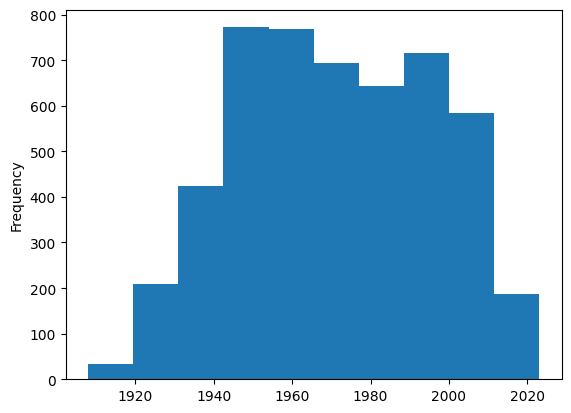

In [78]:
crashes.Year.plot.hist()

There is a somewhat normal distribution of the frequency of accidents between the years.

1920s: The 1920s saw the establishment of the world's first scheduled passenger airlines, such as KLM Royal Dutch Airlines and Deutsche Luft Hansa. These airlines primarily served short-haul routes.

1930s: Aircraft technology continued to improve, and airlines began offering longer-distance routes. Iconic aircraft like the Douglas DC-3 became popular, offering greater passenger comfort and range.

this explains the increase in frequency from 1920 to 1940; later years can be explained by the advancement in technology and the more frequent use of planes as a means of transport.